In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
import warnings

warnings.filterwarnings('ignore')   

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datase/listings_data.csv


In [2]:
pd_df=pd.read_csv("/kaggle/input/datase/listings_data.csv")
pd_df

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
pd_df.describe()

,listing_id,host_id,latitude,longitude,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [4]:
pd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            48895 non-null  int64  
 1   listing_name          48879 non-null  object 
 2   host_id               48895 non-null  int64  
 3   host_name             48874 non-null  object 
 4   borough               48895 non-null  object 
 5   area                  48895 non-null  object 
 6   latitude              48895 non-null  float64
 7   longitude             48895 non-null  float64
 8   room_type             48895 non-null  object 
 9   price (in dollars)    48895 non-null  int64  
 10  minimum_stay          48895 non-null  int64  
 11  no_of_reviews         48895 non-null  int64  
 12  last_review_date      38843 non-null  object 
 13  reviews_per_month     38843 non-null  float64
 14  host_listing_count    48895 non-null  int64  
 15  booking_availabilit

Looks like we got some missing values!! Lets get the exact number of missing values in each features

In [5]:
print(pd_df.isnull().sum())

listing_id                  0
listing_name               16
host_id                     0
host_name                  21
borough                     0
area                        0
latitude                    0
longitude                   0
room_type                   0
price (in dollars)          0
minimum_stay                0
no_of_reviews               0
last_review_date        10052
reviews_per_month       10052
host_listing_count          0
booking_availability        0
dtype: int64


listing_name has 16 missing values.

host_name has 21 missing values.

last_review_date and reviews_per_month have 10,052 missing values each.

**Both the review variables have higher missing values so
 We can ignore these variables for our analysis for now.**

# Max and the mean price for boroughs
# 


In [6]:
pd_df.groupby("borough")["price (in dollars)"].count()

borough
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: price (in dollars), dtype: int64

In [7]:
pd_df.groupby("borough")["price (in dollars)"].max()

borough
Bronx             2500
Brooklyn         10000
Manhattan        10000
Queens           10000
Staten Island     5000
Name: price (in dollars), dtype: int64

In [8]:
 pd_df.groupby("borough")["price (in dollars)"].mean()

borough
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price (in dollars), dtype: float64

There are five boroughs bronx, Brooklyn, Manhattan, Queens, and Staten Island.Each of the boroughs has multiple neighborhoods or areas .

Each of the neighborhoods had the house property listed with details like price and its location in terms of latitude and longitude.

splitting the data into numerical and categorical data

In [43]:
numerical_columns = pd_df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = pd_df.select_dtypes(include=['object']).columns\
df_numerical = pd_df[numerical_columns]

df_categorical = pd_df[categorical_columns]

correlations between numeric features

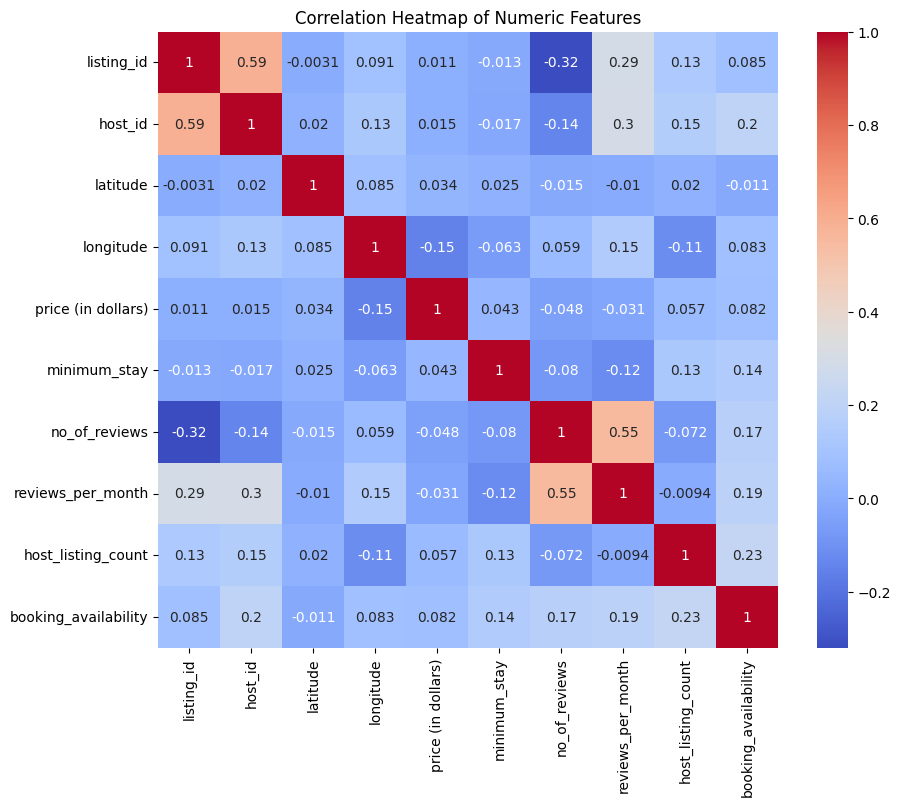

In [44]:

plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Analysis of price by Area and room type



In [9]:
pd_df['room_type'].describe()

count               48895
unique                  3
top       Entire home/apt
freq                25409
Name: room_type, dtype: object

<Axes: xlabel='borough', ylabel='price (in dollars)'>

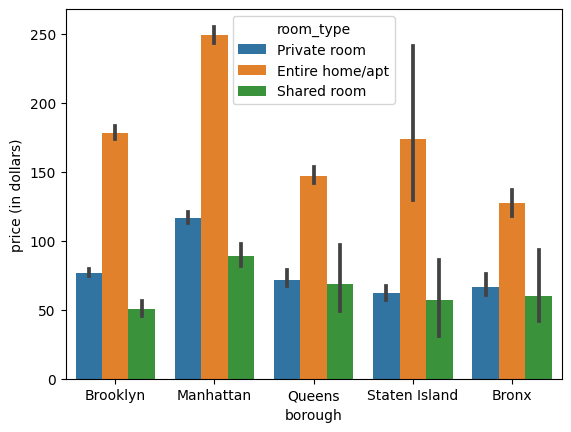

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="borough", y="price (in dollars)", hue="room_type", data=pd_df)

Manhattan has the most number of property listings and has the most expensive rooms.

 Manhattan also has the most number of Entire home/app properties and is also popular among the neighborhood_group followed by Brookyln.

Bronx and Staten Island have the least number of property listings

Analysis of number of room of each type across boroughs

<Axes: xlabel='borough', ylabel='count'>

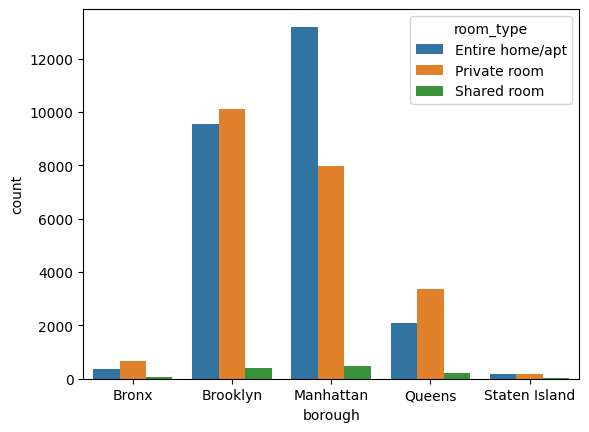

In [12]:
df_room_type = pd_df.groupby(["borough", "room_type"]).agg(
    count=("room_type", "count")
)
df_room_type = df_room_type.reset_index()
sns.barplot(x="borough", y="count", hue="room_type", data=df_room_type)

Analysis of room by the number of days of stay

In [13]:
pd_df.head()

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


<Axes: xlabel='borough', ylabel='minimum_stay'>

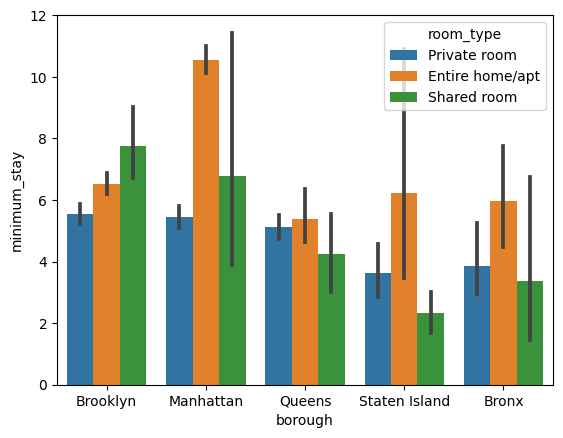

In [15]:
sns.barplot(x="borough", y="minimum_stay", hue="room_type", data=pd_df)

# Calculating the average price per region

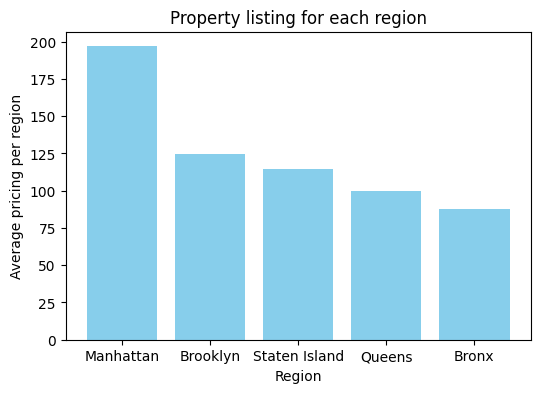

In [30]:
avg_price = pd_df.groupby('borough')['price (in dollars)'].mean().reset_index()


avg_price = avg_price.sort_values(by='price (in dollars)', ascending=False)

fig = plt.figure(1, figsize=(6, 4))
plt.bar(avg_price['borough'],avg_price['price (in dollars)'], color='skyblue')
plt.title("Property listing for each region")
plt.xlabel("Region")
plt.ylabel("Average pricing per region")
plt.show()

Analysis of room type and price

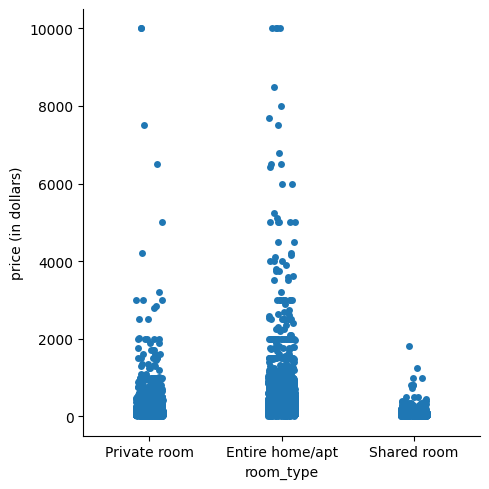

In [39]:
sns.catplot(x='room_type', y='price (in dollars)', data=pd_df)

Approximately

For Entire Home or Apartment most of the prices are between 0 and 1800.
For Private Rooms most of the prices are between 0 and 1300.
For Shared Rooms most of the prices are between 0 and 700.
Outliers:

 outliers for private room with price = 10000
 outliers for shared room with price = 2000

swarm plot

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 94.6% of the points cannot be placed; you may want to decrease the size of the mar

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 97.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 81.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


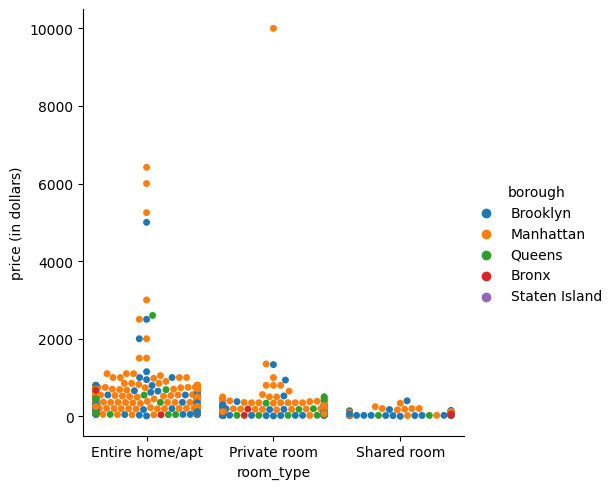

In [36]:
sns.catplot(x='room_type', y='price (in dollars)', hue="borough", data=pd_df.sample(frac=0.1), kind="swarm")

This is ONLY on approx 20% OF THE WHOLE DATASET due to some limitations!idk

It seems that shared rooms are the cheapest rooms (with differnet areas). However the entire home/apt are the most expensive and this makes sense honestly
For entire home/apt type: most of Manhattan's room prices are apprx between 500 and 1500. Also, there are some outliers with prices higher than 2000. But why? What could be the reasons for making these rooms higher than 2000?
For Private Room type: most of Manhattan's rooms prices are apprx between 500 and 1000.
Prices for shared rooms (with differnet areas) are consistent, but other room types have somwhat wide range of prices.

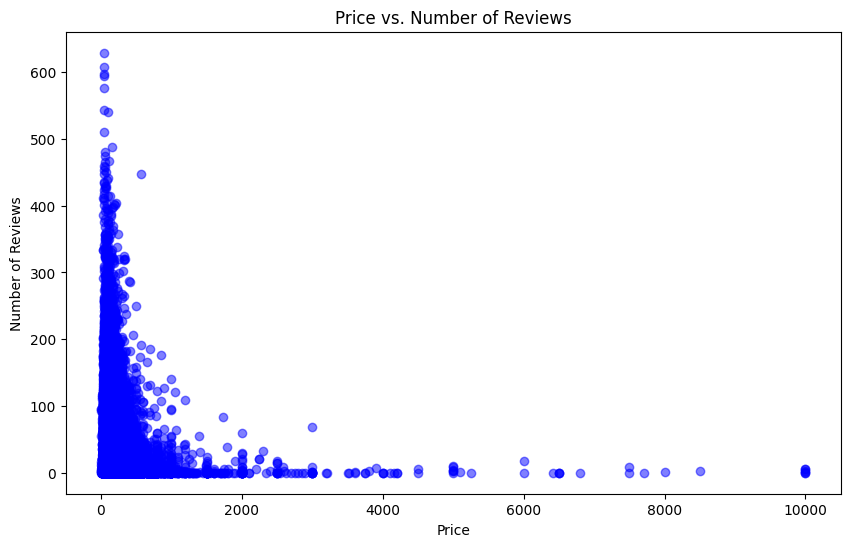

In [41]:
plt.figure(figsize=(10, 6))
plt.scatter(pd_df['price (in dollars)'], pd_df['no_of_reviews'], alpha=0.5, color='blue')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Price vs. Number of Reviews')
plt.show()


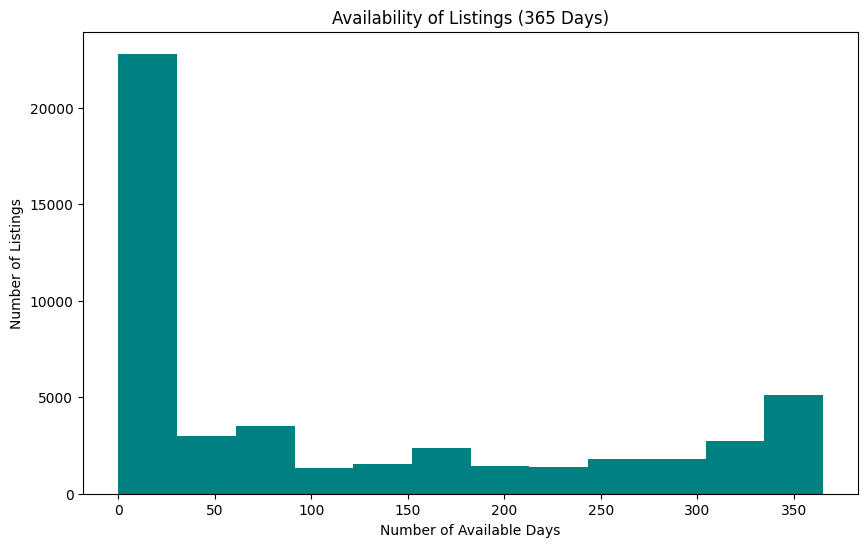

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(pd_df['booking_availability'], bins=12, color='teal')
plt.xlabel('Number of Available Days')
plt.ylabel('Number of Listings')
plt.title('Availability of Listings (365 Days)')
plt.show()
